# TM10007 Assignment template

In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

In [0]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

The number of samples: 855
The number of columns: 268
Feature ranking:
1. feature 1 (0.061367)
2. feature 224 (0.030370)
3. feature 140 (0.030139)
4. feature 11 (0.029998)
5. feature 2 (0.029927)
6. feature 105 (0.022715)
7. feature 8 (0.021783)
8. feature 76 (0.017464)
9. feature 229 (0.016565)
10. feature 77 (0.015299)
11. feature 145 (0.012616)
12. feature 226 (0.012292)
13. feature 115 (0.012161)
14. feature 119 (0.011368)
15. feature 118 (0.010938)
16. feature 227 (0.010723)
17. feature 230 (0.009343)
18. feature 209 (0.009158)
19. feature 228 (0.009112)
20. feature 117 (0.008484)
21. feature 141 (0.008228)
22. feature 156 (0.007413)
23. feature 113 (0.007166)
24. feature 160 (0.007164)
25. feature 137 (0.007156)
26. feature 7 (0.007055)
27. feature 111 (0.006902)
28. feature 79 (0.006889)
29. feature 168 (0.006624)
30. feature 161 (0.006402)
31. feature 204 (0.005828)
32. feature 221 (0.005681)
33. feature 103 (0.005664)
34. feature 6 (0.005606)
35. feature 85 (0.005597)
36. feat

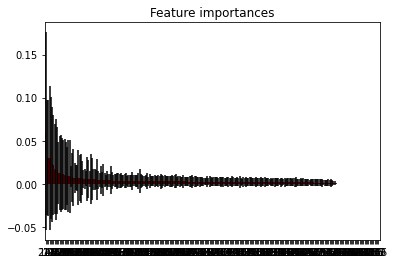

In [7]:
# Some functions we will use
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

# Data loading functions. Uncomment the one you want to use
from adni.load_data import load_data 

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


# Creating vector of labels
x = data.drop('label', axis=1)
y = data['label'].values

"""
# PCA dit errort, het lijkt wel of hij een 'AD' (string) vindt in x
n_features = len(data.columns) #ik denk dus dat dit alle features nu behoudt, maar snap nog niet helemaal hoe die PCA werkt
p = PCA(n_components=n_features)
p = p.fit(x)
x = p.transform(x)
"""

# Leave one out
loo = LeaveOneOut()
for train, test in loo.split(x):
  pass

# Split in train and test data
#model_selection.train_test_split(x, y, test_size=0.5)


# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=100)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()